In [2]:
# importing modules
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf

In [3]:
# Loading the data
final_df = pd.read_csv('final_df.csv')

In [4]:
final_df.head()

,Unnamed: 0,id,task_id,title,workflow_id,workflow_title,action_id,action_title,from_status_id,from_status_title,...,deadline_set_on,deadline_set_on_title,deadline_set_at,deadline,deadline_closed_at,number_of_files,actual task duration,planned task duration,actual task duration in minutes,planned task duration in minutes
0,0,2682,14,Քաղաքացի Արմեն Արարատյանի դիմումը /հասցե` ԵՐԵՎ...,5,Դիմումներ քաղաքացիներից,65,Ի կատարումն,32,Սպասում է մակագրության,...,184,Երևանի քաղաքապետարանի աշխատակազմի բնապահպանութ...,2022-04-01 19:15:42.995975,2022-04-08 18:00:00,2022-04-13 16:41:59.366937,0,11 days 21:26:16.370962,6 days 22:44:17.004025,17126.272849,10004.283400
1,1,3509,14,Քաղաքացի Արմեն Արարատյանի դիմումը /հասցե` ԵՐԵՎ...,5,Դիմումներ քաղաքացիներից,65,Ի կատարումն,38,Մակագրված է ի կատարում,...,190,Երևանի քաղաքապետարանի աշխատակազմի բնապահպանութ...,2022-04-04 14:06:41.225952,2022-04-08 18:00:00,2022-04-06 16:39:49.957361,0,2 days 02:33:08.731409,4 days 03:53:18.774048,3033.145523,5993.312901
2,2,4285,14,Քաղաքացի Արմեն Արարատյանի դիմումը /հասցե` ԵՐԵՎ...,5,Դիմումներ քաղաքացիներից,72,Նշանակել կատարող,38,Մակագրված է ի կատարում,...,817,Կանաչապատում և շրջակա միջավայրի պահպանություն ...,2022-04-04 17:15:34.330971,2022-04-08 18:00:00,2022-04-06 16:38:27.414670,0,1 days 23:22:53.083699,4 days 00:44:25.669029,2842.884728,5804.427817
3,3,9027,14,Քաղաքացի Արմեն Արարատյանի դիմումը /հասցե` ԵՐԵՎ...,5,Դիմումներ քաղաքացիներից,65,Ի կատարումն,35,Վերադարձվել է վերամակագրման,...,817,Կանաչապատում և շրջակա միջավայրի պահպանություն ...,2022-04-06 16:46:29.416110,2022-04-07 18:00:00,2022-04-06 16:51:49.080904,0,0 days 00:05:19.664794,1 days 01:13:30.583890,5.327747,1513.509732
4,4,9070,14,Քաղաքացի Արմեն Արարատյանի դիմումը /հասցե` ԵՐԵՎ...,5,Դիմումներ քաղաքացիներից,65,Ի կատարումն,35,Վերադարձվել է վերամակագրման,...,190,Երևանի քաղաքապետարանի աշխատակազմի բնապահպանութ...,2022-04-06 16:56:04.038150,2022-04-07 18:00:00,2022-04-13 16:41:59.369842,0,6 days 23:45:55.331692,1 days 01:03:55.961850,10065.922195,1503.932697


In [5]:
final_df.describe()

,Unnamed: 0,id,task_id,workflow_id,action_id,from_status_id,to_status_id,deadline_set_by,deadline_set_on,number_of_files,actual task duration in minutes,planned task duration in minutes
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000
mean,4536.500000,15272.717214,4999.397730,9.997906,184.616046,96.439718,95.767137,590.242341,648.559731,0.0,10916.383352,14897.844520
std,2619.582505,18739.406440,3287.135127,7.341784,184.943900,91.508704,90.297463,538.194735,486.439409,0.0,10369.736404,13300.041208
min,0.000000,2478.000000,14.000000,4.000000,28.000000,13.000000,13.000000,3.000000,3.000000,0.0,2.039537,3.341200
25%,2268.250000,7204.750000,2096.750000,5.000000,65.000000,32.000000,30.000000,39.000000,210.000000,0.0,2686.689911,5692.715644
50%,4536.500000,11382.000000,4654.000000,5.000000,72.000000,38.000000,38.000000,545.000000,545.000000,0.0,8474.900290,10550.680491
75%,6804.750000,15699.750000,7655.500000,20.000000,417.000000,215.000000,221.000000,913.000000,884.000000,0.0,16085.449830,20403.729383
max,9073.000000,598510.000000,11208.000000,26.000000,902.000000,423.000000,298.000000,1735.000000,1776.000000,0.0,43528.366919,339306.970539


In [6]:
X = final_df[['action_id', 'from_status_id', 'deadline_set_on', 'workflow_id', 'to_status_id', 'deadline_set_by', 'planned task duration in minutes']]
Y = final_df['actual task duration in minutes']

In [7]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full, y_train_full, random_state=42)

In [8]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=x_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(x_train)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=1000,
                                                     restore_best_weights=True)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 7)                 15        
 on)                                                             
                                                                 
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                        

In [10]:
history = model.fit(x_train, y_train, epochs=10000,
                    validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test, rmse_test = model.evaluate(x_test, y_test)
X_new = x_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10000
171/171 [==============================] - 2s 5ms/step - loss: 158821808.0000 - root_mean_squared_error: 12602.4521 - val_loss: 91094256.0000 - val_root_mean_squared_error: 9544.3311
Epoch 2/10000
171/171 [==============================] - 1s 3ms/step - loss: 91150720.0000 - root_mean_squared_error: 9547.2891 - val_loss: 86172152.0000 - val_root_mean_squared_error: 9282.8955
Epoch 3/10000
171/171 [==============================] - 1s 5ms/step - loss: 87212600.0000 - root_mean_squared_error: 9338.7686 - val_loss: 82980552.0000 - val_root_mean_squared_error: 9109.3662
Epoch 4/10000
171/171 [==============================] - 1s 3ms/step - loss: 84055688.0000 - root_mean_squared_error: 9168.1885 - val_loss: 80832840.0000 - val_root_mean_squared_error: 8990.7090
Epoch 5/10000
171/171 [==============================] - 1s 4ms/step - loss: 82489568.0000 - root_mean_squared_error: 9082.3770 - val_loss: 79429792.0000 - val_root_mean_squared_error: 8912.3389
Epoch 6/10000
171/171 [

In [11]:
rmse_test

7693.6923828125

In [12]:
r2_score(y_test, model.predict(x_test))

57/57 [==============================] - 0s 2ms/step


0.4691144154579885

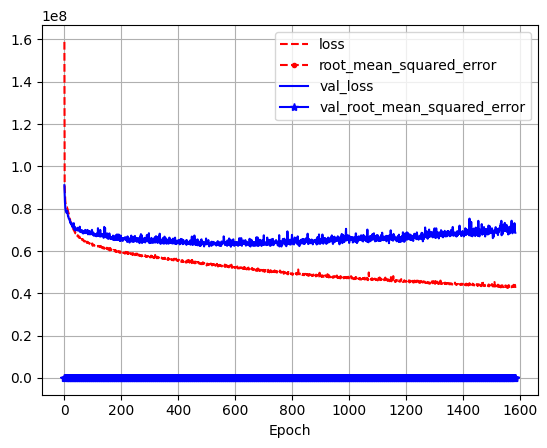

In [13]:
pd.DataFrame(history.history).plot(
    grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [14]:
model.save("my_keras_model", save_format="tf")

In [15]:
model = tf.keras.models.load_model("my_keras_model")
y_pred = model.predict((X_new))

1/1 [==============================] - 0s 79ms/step


In [16]:
y_pred

array([[21142.521],
       [13324.527],
       [ 8840.006]], dtype=float32)